## Load essential packages

In [1]:
import tensorflow as tf 
import tensorflow.keras 

import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2 
import pandas as pd 
import seaborn as sns

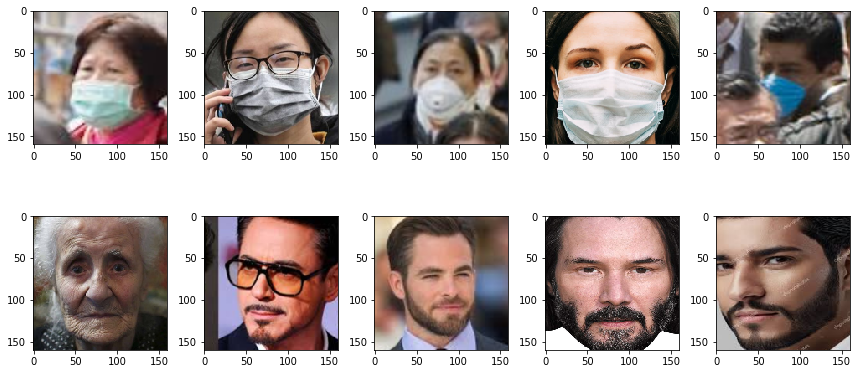

In [15]:
IMG_DIR = 'D:/Workspace/Datasets/MaskedFaces/'
PIC_SIZE = 160

plt.figure(0, figsize=(12, 20))
cpt = 0

for mask in os.listdir(IMG_DIR + 'training_set/'):
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        img = tf.keras.preprocessing.image.load_img(IMG_DIR + 'training_set/' + mask + '/' + os.listdir(IMG_DIR + 'training_set/' + mask)[i], target_size=(PIC_SIZE, PIC_SIZE))
        plt.imshow(img)

plt.tight_layout()
plt.show()

In [17]:
for mask in os.listdir(IMG_DIR + 'training_set/'):
    print(str(len(os.listdir(IMG_DIR + 'training_set/' + mask))) + ' ' + mask + ' images')

1025 mask images
1181 nomask images


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(IMG_DIR + 'training_set/',
                                                    target_size=(PIC_SIZE, PIC_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

valid_generator = datagen_validation.flow_from_directory(IMG_DIR + 'test_set/',
                                                    target_size=(PIC_SIZE, PIC_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode='rgb')                                       

Found 2206 images belonging to 2 classes.
Found 551 images belonging to 2 classes.


In [20]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [21]:
#
NB_CLASSES = 2
NB_CHANNELS = 3 # gray image

model = Sequential()

# first layer block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(PIC_SIZE, PIC_SIZE, NB_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# second layer block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# third layer block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# fourth layer block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# fith layer block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# flattening
model.add(Flatten())

# fully connected first layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# fully connected second layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# fully connected third layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(NB_CLASSES, activation='softmax'))

opt = Adam(learning_rate=1e-4)

In [22]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 160, 160, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 160, 160, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 160, 160, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 80, 128)      

In [25]:
# train model
EPOCHS = 10

from keras.callbacks import ModelCheckpoint

ckpt = ModelCheckpoint(filepath='checkpoints/model_weights.h5', monitor='val_acc', verbose=1, save_best_only=True)

history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=train_generator.n // train_generator.batch_size,
                            epochs=EPOCHS,
                            validation_data=valid_generator,
                            validation_steps=valid_generator.n // valid_generator.batch_size,
                            callbacks=[ckpt])

model.save_weights('checkpoints/model_weights.h5')

model_json = model.to_json()

with open('checkpoints/model_final.json', "w") as file:
    file.write(model_json)

Epoch 1/10
34/34 [==============================] - 23s 683ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.7000 - val_accuracy: 0.8242
Epoch 2/10
34/34 [==============================] - 24s 696ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.8377 - val_accuracy: 0.8193
Epoch 3/10
34/34 [==============================] - 24s 693ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.9669 - val_accuracy: 0.6386
Epoch 4/10
34/34 [==============================] - 24s 698ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.4351 - val_accuracy: 0.8234
Epoch 5/10
34/34 [==============================] - 24s 709ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.8570 - val_accuracy: 0.8152
Epoch 6/10
34/34 [==============================] - 24s 705ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.8067 - val_accuracy: 0.7741
Epoch 7/10
34/34 [==============================] - 24s 707ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.5178 - val_accuracy: 0.8275

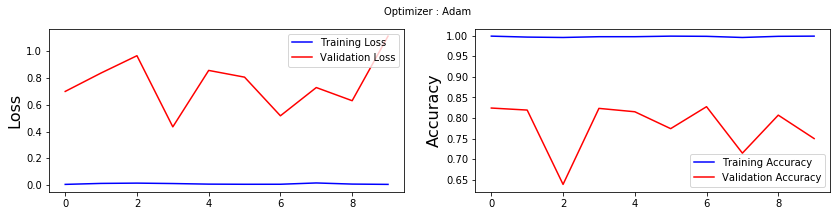

In [26]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()